importing modules

In [1]:
import tensorflow as tf
from tensorflow import keras 
from keras import layers, models 
from keras.datasets import mnist 
from keras.datasets import cifar10
import time
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

data manipulation

In [2]:
gpus = tf.config.list_physical_devices('CPU')

if gpus:
    print("Using GPU")
else:
    print("No GPU found, using CPU")

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0






Using GPU


RMSprop optimization

In [3]:
model_1 = models.Sequential(
    [
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(10, activation='softmax')
    ]
)
model_1.summary()

model_1.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001), 
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
    loss_weights=None,
    sample_weight_mode=None, 
    weighted_metrics=None
)


T1= time.time()
history_1 = model_1.fit(x_train, y_train, epochs=100, batch_size=1024, validation_split=0.5)
T2= time.time()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 3s 65ms/step - loss: 4.2941 - accuracy: 0.1344 - val_loss: 2.4830 - val_accuracy: 0.1050
Epoch 2/100
25/25 [=================

evaluating 

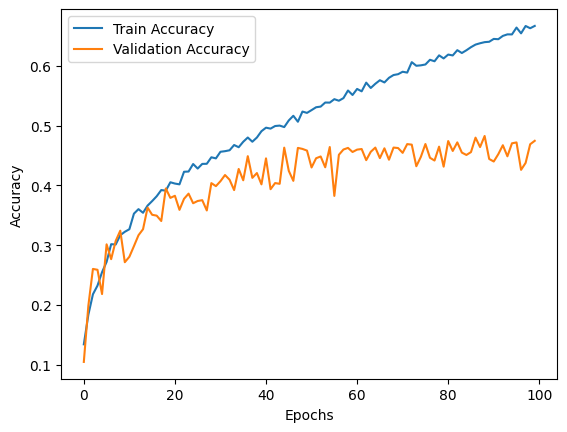

313/313 [==============================] - 2s 5ms/step - loss: 1.6936 - accuracy: 0.4755
Test Loss: 1.6936001777648926
Test Accuracy: 0.4754999876022339
Time taken: 7260.171420097351


In [4]:
plt.plot(history_1.history['accuracy'], label='Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model_1.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Time taken: {T2-T1}')

Nadam

In [5]:
model_2 = models.Sequential(
    [
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(10, activation='softmax')
    ]
)
model_2.summary()

model_2.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=0.001), 
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
    loss_weights=None,
    sample_weight_mode=None, 
    weighted_metrics=None
)


T3= time.time()
history_2 = model_2.fit(x_train, y_train, epochs=100, batch_size=1024, validation_split=0.5)
T4= time.time()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               1573376   
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 3s 64ms/step - loss: 2.5517 - accuracy: 0.1609 - val_loss: 2.1597 - val_accuracy: 0.2126
Epoch 2/100
25/25 [===============

evaluating

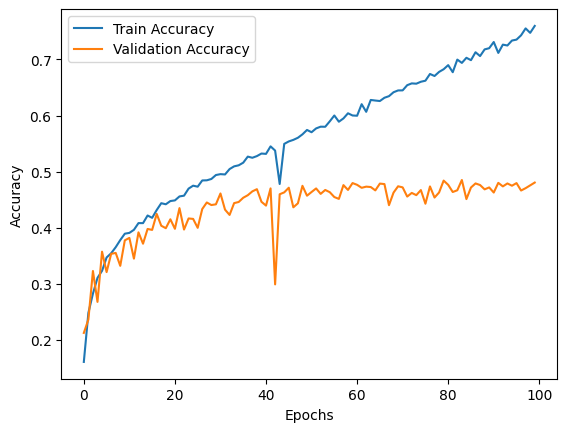

313/313 [==============================] - 2s 5ms/step - loss: 1.7001 - accuracy: 0.4831
Test Loss: 1.700111746788025
Test Accuracy: 0.4830999970436096
Time taken: 66.61936926841736


In [6]:
plt.plot(history_2.history['accuracy'], label='Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model_2.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Time taken: {T4-T3}')

NAG

In [7]:
model_3 = models.Sequential(
    [
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(10, activation='softmax')
    ]
)
model_3.summary()

model_3.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True), 
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
    loss_weights=None,
    sample_weight_mode=None, 
    weighted_metrics=None
)


T5= time.time()
history_3 = model_3.fit(x_train, y_train, epochs=100, batch_size=1024, validation_split=0.5)
T6= time.time()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               1573376   
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 2s 71ms/step - loss: 2.2865 - accuracy: 0.1380 - val_loss: 2.2161 - val_accuracy: 0.1878
Epoch 2/100
25/25 [===============

evaluating

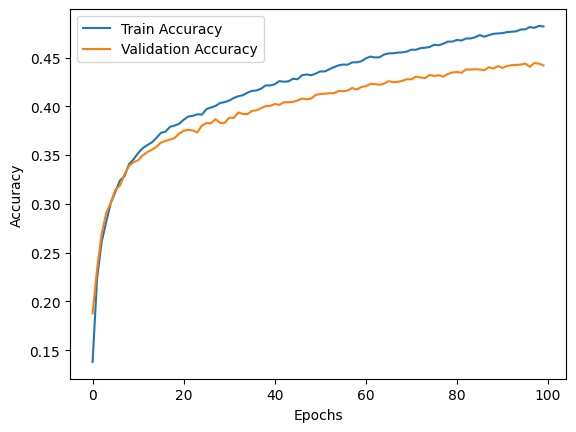

313/313 [==============================] - 2s 5ms/step - loss: 1.5778 - accuracy: 0.4465
Test Loss: 1.5777941942214966
Test Accuracy: 0.4465000033378601
Time taken: 53.65422749519348


In [8]:
plt.plot(history_3.history['accuracy'], label='Train Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model_3.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Time taken: {T6-T5}')

SGDR

In [9]:
initial_lr = 0.01
t_0 = 10  # Number of steps for the first cycle
t_mult = 2  # Factor by which t_0 is multiplied after each cycle

lr_schedule = tf.keras.optimizers.schedules.CosineDecayRestarts(
    initial_learning_rate=initial_lr,
    first_decay_steps=t_0,
    t_mul=t_mult
)

model_4 = models.Sequential(
    [
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(10, activation='softmax')
    ]
)
model_4.summary()

model_4.compile(
    optimizer=keras.optimizers.SGD(learning_rate=lr_schedule),
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
    loss_weights=None,
    sample_weight_mode=None, 
    weighted_metrics=None
)


T7= time.time()
history_4 = model_4.fit(x_train, y_train, epochs=100, batch_size=1024, validation_split=0.5)
T8= time.time()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               1573376   
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 10)                2570      
                                                                 
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 2s 51ms/step - loss: 2.2760 - accuracy: 0.1354 - val_loss: 2.2134 - val_accuracy: 0.1880
Epoch 2/100
25/25 [===============

evaluating

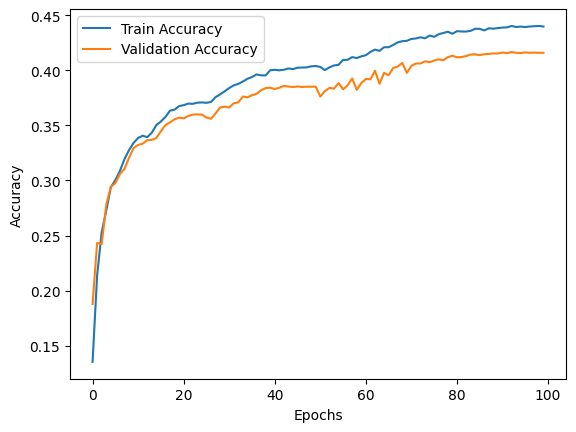

313/313 [==============================] - 1s 4ms/step - loss: 1.6659 - accuracy: 0.4241
Test Loss: 1.665907621383667
Test Accuracy: 0.42410001158714294
Time taken: 50.66266870498657


In [10]:
plt.plot(history_4.history['accuracy'], label='Train Accuracy')
plt.plot(history_4.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model_4.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Time taken: {T8-T7}')

Learning Rate Schedulers(Exponential Decay)

In [11]:
initial_lr = 0.01  # Starting learning rate
decay_rate = 0.1   # Factor by which the learning rate decays
decay_steps = 1024 # How often to apply the decay

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=decay_steps,
    decay_rate=decay_rate,
    staircase=False  # If True, applies decay in discrete intervals (staircase effect)
)

model_5 = models.Sequential(
    [
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(10, activation='softmax')
    ]
)
model_5.summary()
model_5.compile(
    optimizer=keras.optimizers.SGD(learning_rate=lr_schedule),
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
    loss_weights=None,
    sample_weight_mode=None, 
    weighted_metrics=None
)


T9= time.time()
history_5 = model_5.fit(x_train, y_train, epochs=100, batch_size=1024, validation_split=0.5)
T10= time.time()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 dense_12 (Dense)            (None, 512)               1573376   
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 10)                2570      
                                                                 
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 2s 53ms/step - loss: 2.2289 - accuracy: 0.1845 - val_loss: 2.1599 - val_accuracy: 0.2326
Epoch 2/100
25/25 [===============

evaluating

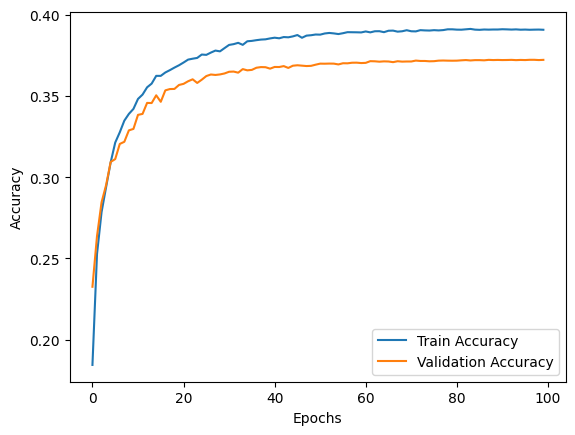

313/313 [==============================] - 2s 5ms/step - loss: 1.7933 - accuracy: 0.3823
Test Loss: 1.7932976484298706
Test Accuracy: 0.3822999894618988
Time taken: 53.38281202316284


In [12]:
plt.plot(history_5.history['accuracy'], label='Train Accuracy')
plt.plot(history_5.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model_5.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Time taken: {T10-T9}')

Learning Rate Schedulers(Step Decay)

In [13]:
initial_lr = 0.01  # Initial learning rate
decay_steps = [1000, 2000, 5000]  # Step intervals at which the learning rate drops
lr_values = [initial_lr, 0.005, 0.001, 0.0001]  # Learning rates at each interval

# Learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=decay_steps,
    values=lr_values
)

model_6 = models.Sequential(
    [
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(10, activation='softmax')
    ]
)
model_6.summary()
model_6.compile(
    optimizer=keras.optimizers.SGD(learning_rate=lr_schedule),
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
    loss_weights=None,
    sample_weight_mode=None, 
    weighted_metrics=None
)


T11= time.time()
history_6 = model_6.fit(x_train, y_train, epochs=100, batch_size=1024, validation_split=0.5)
T12= time.time()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 3072)              0         
                                                                 
 dense_15 (Dense)            (None, 512)               1573376   
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dense_17 (Dense)            (None, 10)                2570      
                                                                 
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 2s 73ms/step - loss: 2.2512 - accuracy: 0.1642 - val_loss: 2.1905 - val_accuracy: 0.1824
Epoch 2/100
25/25 [===============

evaluating

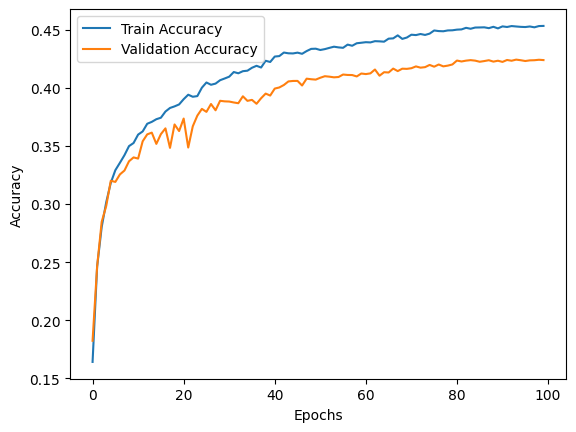

313/313 [==============================] - 1s 4ms/step - loss: 1.6411 - accuracy: 0.4298
Test Loss: 1.6410887241363525
Test Accuracy: 0.42980000376701355
Time taken: 62.09033966064453


In [14]:
plt.plot(history_6.history['accuracy'], label='Train Accuracy')
plt.plot(history_6.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model_6.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Time taken: {T12-T11}')

adam

In [16]:
model_7 = models.Sequential(
    [
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(10, activation='softmax')
    ]
)
model_7.summary()

model_7.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
)


T13= time.time()
history_7 = model_7.fit(x_train, y_train, epochs=100, batch_size=1024, validation_split=0.5)
T14= time.time()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 3072)              0         
                                                                 
 dense_21 (Dense)            (None, 512)               1573376   
                                                                 
 dense_22 (Dense)            (None, 256)               131328    
                                                                 
 dense_23 (Dense)            (None, 10)                2570      
                                                                 
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 1s 42ms/step - loss: 2.4551 - accuracy: 0.1599 - val_loss: 2.0572 - val_accuracy: 0.2525
Epoch 2/100
25/25 [===============

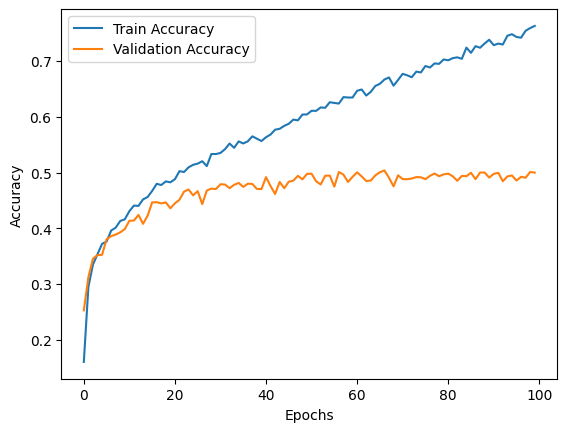

313/313 [==============================] - 1s 4ms/step - loss: 1.6246 - accuracy: 0.5003
Test Loss: 1.6246438026428223
Test Accuracy: 0.5002999901771545
Time taken: 51.93663835525513


In [17]:
plt.plot(history_7.history['accuracy'], label='Train Accuracy')
plt.plot(history_7.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model_7.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Time taken: {T14-T13}')